<a href="https://colab.research.google.com/github/tonyhenrt/-/blob/master/%E6%9C%AC%E7%A7%91%E7%94%9F%E8%AE%BA%E6%96%87%E5%9B%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
# df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
df=pd.read_csv("极端.csv",index_col=0,header=0)
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

KeyError: ignored

In [ ]:
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
print(df)

network           1                     2                     3             \
node              1                     1                     1              
hemi             lh         rh         lh         rh         lh         rh   
0         56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1         55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2         60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3         18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4         -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   
..              ...        ...        ...        ...        ...        ...   
915       -7.429513  -4.813219  -3.670537   1.442261 -19.680431 -29.109356   
916      -33.554138 -38.605621 -25.664803 -30.252352   5.562785  20.182186   
917      -78.539566 -74.197189 -54.041595 -39.970291 -14.277059 -30.606461   
918     -103.235825 -98.744286 -40.109543 -44.907734  12.109148 

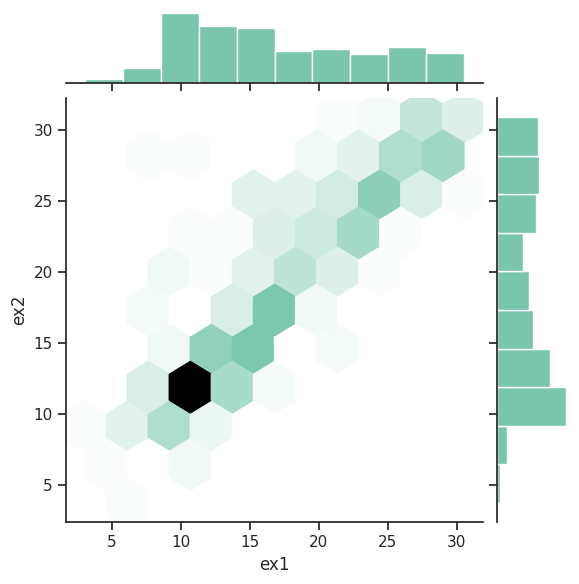

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="ticks")
df=pd.read_csv("极端.csv")
# rs = np.random.RandomState(11)
x = df["ex1"]
y = df["ex2"]
sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")